<a href="https://colab.research.google.com/github/Lique0/Reducao_de_dimensionalidade/blob/main/Redu%C3%A7%C3%A3o_de_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para importar imagem para dentro do Python foi utilizada a biblioteca pillow. Este projeto foi desenvolvido dentor do colab, portanto a biblioteca necessária já está disponivel.

In [ ]:
from PIL import Image

Salvando a imagem em uma variavel.

In [ ]:
imagem = Image.open("/content/61.jpg")

Funçãio para transformar a imagem colorida em escala de cinza de 0 a 255. A função percorre todo o comprimento e altura da imagem e modifica pixel a pixel RGB para escala de cinza.

In [ ]:
def escala_cinza(imagem):
  l, a = imagem.size
  img = Image.new("RGB", (l, a))

  for x in range(l):
    for y in range(a):
      pixel = imagem.getpixel((x, y))
      lum = int(0.3*pixel[0] + 0.59*pixel[1] + 0.11*pixel[2])
      img.putpixel((x, y), (lum, lum, lum))
  return img

Aplicação da função na imagem e salvando a imagem em escala de cinza.

In [ ]:
imagem_cinza = escala_cinza(imagem)
imagem_cinza.save("imagem_cinza.jpg")

Função para binarizar a imagem em escalas de cinza, onde apos percorrer toda a imagem pixel a pixel, todos que estivem acima do limiar assumem o valor binario 1 = (cor branca) e os abaixo do limiar ficam com valor igual a 0 = (cor preta).  

In [ ]:
def imagem_binaria(imagem_cinza, limiar=127):
  l, a = imagem_cinza.size
  imgb = Image.new("1", (l, a))

  for x in range(l):
      for y in range(a):
          valor_cinza = imagem_cinza.getpixel((x, y))
          media_cinza = int((valor_cinza[0] + valor_cinza[1] + valor_cinza[2]) // 3)
          if media_cinza > limiar:
              valor_binario = 1
          else:
              valor_binario = 0
          imgb.putpixel((x, y), valor_binario)

  return imgb

Aplicando a função na imagem em escala de cinza e salvando a imagem.

In [ ]:
imagem_pb = imagem_binaria(imagem_cinza)
imagem_pb.save("imagem_pb.jpg")

Apresentação das imagens obritidas após redução de dimensionalidade.

imagem Original


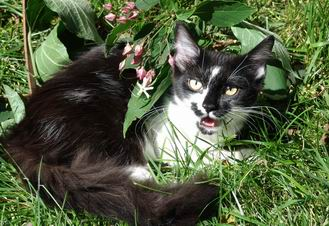

Imagem em Tons de Cinza:


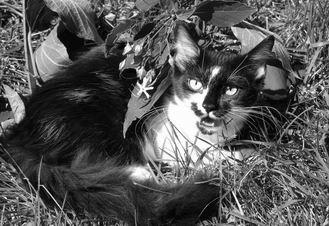

Imagem Binarizada:


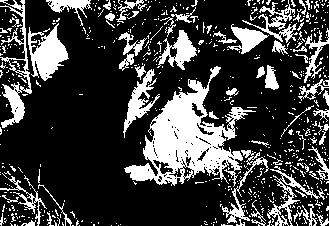

In [ ]:
print("imagem Original")
display(imagem)

print("Imagem em Tons de Cinza:")
display(imagem_cinza)

print("Imagem Binarizada:")
display(imagem_pb)